# **Proyek Analisis Data: Film Dataset**


- Pertanyaan 1
- Pertanyaan 2


## Import Semua Packages/Library yang Digunakan


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Data Wrangling


### Gathering Data


In [2]:
data_pd = pd.read_csv("data/FilmsDataset.csv")
data_pd.head()

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


### Assessing Data


In [3]:
"""
kesalah data yang sering terjadi
-duplicated data
-missing value
-invalid value
-inacurated data
-inconsistant data
-outlier
"""
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   index                                           300 non-null    int64  
 1   Genre                                           300 non-null    object 
 2   Year                                            300 non-null    int64  
 3   Movies Released                                 300 non-null    int64  
 4   Gross                                           300 non-null    int64  
 5   Tickets Sold                                    300 non-null    int64  
 6   Inflation-Adjusted Gross                        300 non-null    int64  
 7   Top Movie                                       300 non-null    object 
 8   Top Movie Gross (That Year)                     300 non-null    int64  
 9   Top Movie Inflation-Adjusted Gross (That Ye

In [4]:
data_pd.describe(include = 'all')

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
count,300.000000,300,300.000000,300.000000,3.000000e+02,3.000000e+02,3.000000e+02,300,3.000000e+02,3.000000e+02
unique,NaN,14,NaN,NaN,NaN,NaN,NaN,287,NaN,NaN
top,NaN,Adventure,NaN,NaN,NaN,NaN,NaN,"Three Billboards Outside Ebbing, Missouri",NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
mean,149.500000,NaN,2006.963333,46.700000,7.382075e+08,1.078744e+08,9.676330e+08,NaN,1.350016e+08,1.766255e+08
std,86.746758,NaN,6.801189,60.938398,8.783016e+08,1.227454e+08,1.101026e+09,NaN,1.395006e+08,1.737089e+08
min,0.000000,NaN,1995.000000,1.000000,2.010000e+03,2.250000e+02,2.018000e+03,NaN,2.010000e+03,2.018000e+03
25%,74.750000,NaN,2001.000000,6.000000,5.786591e+07,8.275600e+06,7.423214e+07,NaN,2.528707e+07,3.603908e+07
50%,149.500000,NaN,2007.000000,25.000000,3.694118e+08,5.634667e+07,5.054296e+08,NaN,9.351396e+07,1.223360e+08
75%,224.250000,NaN,2013.000000,56.250000,1.294524e+09,1.859968e+08,1.668391e+09,NaN,1.886230e+08,2.841907e+08


In [5]:
#Duplikasi
duplicated_data = data_pd.duplicated().sum()
print("Jumlah duplikasi data pada dataset: ",duplicated_data)

Jumlah duplikasi data pada dataset:  0


In [6]:
#Missing Value
data_pd.isnull().sum()

index                                             0
Genre                                             0
Year                                              0
Movies Released                                   0
Gross                                             0
Tickets Sold                                      0
Inflation-Adjusted Gross                          0
Top Movie                                         0
Top Movie Gross (That Year)                       0
Top Movie Inflation-Adjusted Gross (That Year)    0
dtype: int64

In [7]:
data = data_pd.rename(columns={
    "Year":"Tahun",
    "Movies Released":"Film Dirilis",
    "Gross":"Pendapatan Kotor",
    "Tickets Sold":"Tiket Terjual",
    "Inflation-Adjusted Gross":"Pendapatan Kotor-Inflasi",
    "Top Movie":"Film Teratas",
    "Top Movie Gross (That Year)":"Pendapatan Kotor Film Teratas",
    "Top Movie Inflation-Adjusted Gross (That Year)":"Pendapatan Kotor Film Teratas-Inflasi",
})
data.head()

,index,Genre,Tahun,Film Dirilis,Pendapatan Kotor,Tiket Terjual,Pendapatan Kotor-Inflasi,Film Teratas,Pendapatan Kotor Film Teratas,Pendapatan Kotor Film Teratas-Inflasi
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08


In [8]:
#Outliers
columns = [
    "Pendapatan Kotor",
    "Pendapatan Kotor-Inflasi",
    "Pendapatan Kotor Film Teratas",
    "Pendapatan Kotor Film Teratas-Inflasi"
]
result = {}
for column in columns:
    q25, q75 = np.percentile(data[column], 25), np.percentile(data[column], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    outliers = [x for x in data[column] if x < minimum or x > maximum]
    result[column] = outliers

for item in result.values():
    print(item)

[3202949362, 3284291528, 4159137913, 3305708764, 4142067464]
[4352101018, 4171315189, 4288527865, 4142067248]
[441226247, 742208942, 486295561, 517218368, 608581744, 531001578, 623279547, 652270625, 700059566, 443319081, 504014165]
[760054461.932797, 772841448.728747, 702363943.500333, 672351601.17833, 700059529.493384, 847883130.859544]


### Cleaning Data


In [9]:
'''
outlier
'''
for column in columns:
    q1 = np.percentile(data[column],25)
    q2 = np.percentile(data[column],75)
    iqr = q2 - q1
    max = q2 + (1.5*iqr)
    min = q1 - (1.5*iqr)
    lower_than = data[column] < min
    upper_than = data[column] > max
    data.drop(data[lower_than].index,inplace=True)
    data.drop(data[upper_than].index,inplace=True)

In [10]:
true_data = data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   index                                  278 non-null    int64  
 1   Genre                                  278 non-null    object 
 2   Tahun                                  278 non-null    int64  
 3   Film Dirilis                           278 non-null    int64  
 4   Pendapatan Kotor                       278 non-null    int64  
 5   Tiket Terjual                          278 non-null    int64  
 6   Pendapatan Kotor-Inflasi               278 non-null    int64  
 7   Film Teratas                           278 non-null    object 
 8   Pendapatan Kotor Film Teratas          278 non-null    int64  
 9   Pendapatan Kotor Film Teratas-Inflasi  278 non-null    float64
dtypes: float64(1), int64(7), object(2)
memory usage: 23.9+ KB


## Exploratory Data Analysis (EDA)


In [11]:
data.head()

,index,Genre,Tahun,Film Dirilis,Pendapatan Kotor,Tiket Terjual,Pendapatan Kotor-Inflasi,Film Teratas,Pendapatan Kotor Film Teratas,Pendapatan Kotor Film Teratas-Inflasi
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
5,5,Adventure,2000,30,1327311892,246254507,2208902928,How the Grinch Stole Christmas,253367455,4.216523e+08
6,6,Adventure,2001,32,2268870844,400844935,3595579067,Harry Potter and the Sorcerer’s Stone,300404434,4.760641e+08


In [12]:
#Genre film yang paling sering ditonton
exp_genre_yang_paling_banyak_dirilis = data.groupby(["Genre"])["Film Dirilis"].sum().reset_index().sort_values(ascending=False,by="Film Dirilis")
exp_genre_yang_paling_banyak_dirilis["Film Dirilis"] = exp_genre_yang_paling_banyak_dirilis["Film Dirilis"].astype(int)
exp_genre_yang_paling_banyak_dirilis

,Genre,Film Dirilis
6,Drama,4997
2,Comedy,2230
5,Documentary,2143
12,Thriller or Suspense,938
11,Romantic Comedy,574
0,Action,553
7,Horror,553
1,Adventure,519
4,Dark Comedy,174
9,Musical,161


In [13]:
exp_tahun_pendapatan_kotor_terbanyak = data.groupby("Tahun").agg({
    "Pendapatan Kotor": "max",
    "Pendapatan Kotor-Inflasi": "max"
}).reset_index()
exp_tahun_pendapatan_kotor_terbanyak.head(5)


,Tahun,Pendapatan Kotor,Pendapatan Kotor-Inflasi
0,1995,1525963099,3146640569
1,1996,1373074715,2786533451
2,1997,1456612580,2846582614
3,1998,1614467732,3087798481
4,1999,1458861532,2575981251


In [14]:
#film yang paling banyak ditonton
exp_film_dengan_pendapatan_kotor_terbanyak = data.groupby(by="Film Teratas").agg({
    "Pendapatan Kotor Film Teratas": "sum"
}).sort_values(ascending=False,by="Pendapatan Kotor Film Teratas").reset_index()
exp_film_dengan_pendapatan_kotor_terbanyak.head(5)

,Film Teratas,Pendapatan Kotor Film Teratas
0,The Hunger Games: Catching Fire,407139699
1,Transformers: Revenge of the Fallen,402111870
2,Frozen,400738009
3,Harry Potter and the Deathly Hallows: Part II,381011219
4,Star Wars Ep. III: Revenge of the Sith,380270577


## Visualization & Explanatory Analysis


### Genre Film yang serin di tonton pada tahun itu


In [15]:
exp_genre_yang_paling_banyak_dirilis.head(5)

,Genre,Film Dirilis
6,Drama,4997
2,Comedy,2230
5,Documentary,2143
12,Thriller or Suspense,938
11,Romantic Comedy,574


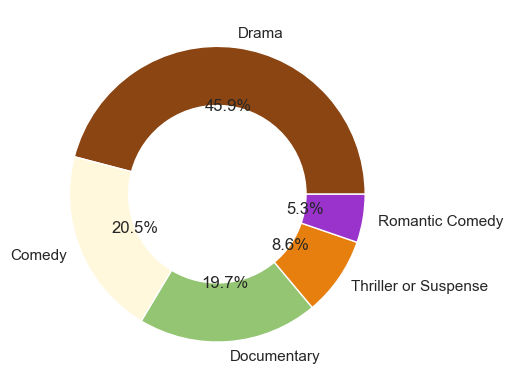

In [16]:
flavor = exp_genre_yang_paling_banyak_dirilis["Genre"].head(5)
votes = exp_genre_yang_paling_banyak_dirilis["Film Dirilis"].head(5)
colors = ('#8B4513', '#FFF8DC', '#93C572', '#E67F0D','#93C')
explode = (0,0,0,0,0)

plt.pie(
    x=votes,
    labels=flavor,
    colors=colors,
    wedgeprops={'width':0.4},
    explode=explode,
    autopct='%1.1f%%'
)
plt.show()

### Pendapatan kotor terbanyak berdasarkan tahun


In [17]:
data = exp_tahun_pendapatan_kotor_terbanyak.head(10)
data

,Tahun,Pendapatan Kotor,Pendapatan Kotor-Inflasi
0,1995,1525963099,3146640569
1,1996,1373074715,2786533451
2,1997,1456612580,2846582614
3,1998,1614467732,3087798481
4,1999,1458861532,2575981251
5,2000,1749265350,2911114382
6,2001,2268870844,3595579067
7,2002,1601890899,2473142300
8,2003,2424131447,3606046052
9,2004,1674423943,2418611849


C:\Users\admin\AppData\Local\Temp\ipykernel_12176\4258883484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x=data["Tahun"],y=data["Pendapatan Kotor"],label ="Pendapatan Kotor",palette="viridis")


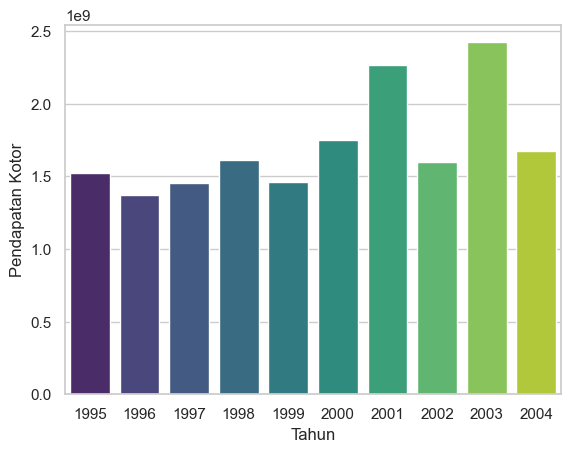

In [18]:
# Plot pendapatan kotor
sns.barplot(data=data,x=data["Tahun"],y=data["Pendapatan Kotor"],label ="Pendapatan Kotor",palette="viridis")
plt.show()

In [19]:
data = exp_film_dengan_pendapatan_kotor_terbanyak.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Film Teratas                   5 non-null      object
 1   Pendapatan Kotor Film Teratas  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


C:\Users\admin\AppData\Local\Temp\ipykernel_12176\754088939.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["Film Teratas"], y=data["Pendapatan Kotor Film Teratas"], data=data, palette='viridis')


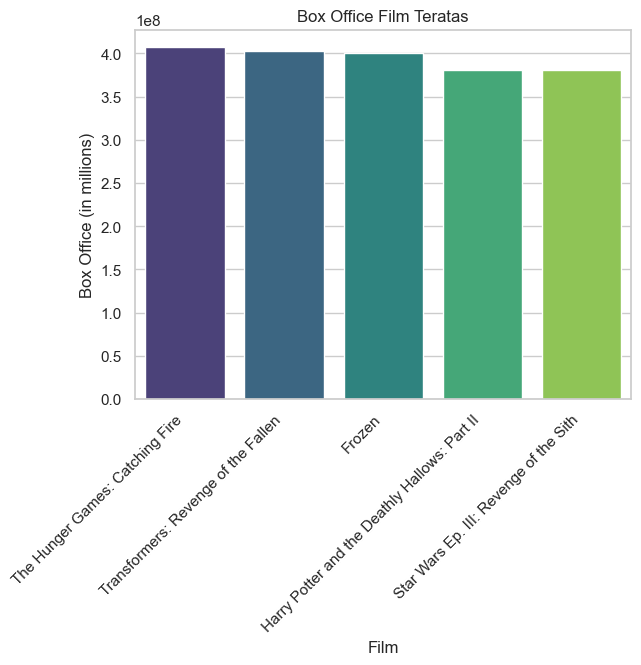

In [20]:
# Membuat barplot
sns.set(style="whitegrid")
sns.barplot(x=data["Film Teratas"], y=data["Pendapatan Kotor Film Teratas"], data=data, palette='viridis')
plt.title('Box Office Film Teratas')
plt.xlabel('Film')
plt.ylabel('Box Office (in millions)')

# Rotasi label sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menambahkan nilai di atas bar
# for index, value in enumerate(df['Box Office']):
#     plt.text(index, value + 5, f'{value:,}', ha='center', va='bottom')

# Menampilkan plot
plt.show()

In [21]:
# true_data.to_csv("dashboard/all_data.csv",index=False)